<a href="https://colab.research.google.com/github/TokyoProgramming/Cancer_Predict/blob/main/cancer_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.text.all import *
from fastai.text.all import *
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np

from google.colab import drive 
drive.mount('/content/gdrive')

     |████████████████████████████████| 727kB 14.7MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 1.2MB 27.0MB/s 
     |████████████████████████████████| 204kB 37.1MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from fastai.tabular.all import *
from sklearn.model_selection import train_test_split


In [3]:
cancer = pd.read_csv("http://logopt.com/data/cancer.csv", index_col=0)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
dep_var = 'diagnosis'
procs = [Categorify, FillMissing, Normalize]
train_idx, test_idx = train_test_split(range(len(cancer)), test_size = 0.3)
cont_names, cat_names = cont_cat_split(cancer, max_card = 50, dep_var = dep_var)

In [5]:
len(train_idx), len(test_idx)

(398, 171)

In [6]:
train = cancer.iloc[train_idx]
test = cancer.iloc[test_idx]


In [10]:
train.shape, test.shape



((398, 31), (171, 31))

In [11]:
cont_names, cat_names

(['radius_mean',
  'texture_mean',
  'perimeter_mean',
  'area_mean',
  'smoothness_mean',
  'compactness_mean',
  'concavity_mean',
  'concave points_mean',
  'symmetry_mean',
  'fractal_dimension_mean',
  'radius_se',
  'texture_se',
  'perimeter_se',
  'area_se',
  'smoothness_se',
  'compactness_se',
  'concavity_se',
  'concave points_se',
  'symmetry_se',
  'fractal_dimension_se',
  'radius_worst',
  'texture_worst',
  'perimeter_worst',
  'area_worst',
  'smoothness_worst',
  'compactness_worst',
  'concavity_worst',
  'concave points_worst',
  'symmetry_worst',
  'fractal_dimension_worst'],
 [])

In [12]:
dls = TabularDataLoaders.from_df(train, y_names='diagnosis', cat_names= cat_names ,cont_names=cont_names, procs= procs, bs=64)

In [14]:
dls.show_batch()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,13.690000,16.070000,87.839996,579.099977,0.08302,0.06374,0.025560,0.020310,0.1872,0.05669,0.1705,0.5066,1.372,13.999999,0.004230,0.015870,0.011690,0.006335,0.01943,0.002177,14.840000,20.209999,99.160003,670.599975,0.1105,0.20960,0.13460,0.06987,0.3323,0.07701,B
1,12.490000,16.850000,79.190003,481.599999,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,0.1716,0.7151,1.047,12.690000,0.004928,0.003012,0.002620,0.003390,0.01393,0.001344,13.340000,19.709999,84.480004,544.200022,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174,B
2,13.540000,14.360000,87.459999,566.299985,0.09779,0.08129,0.066640,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.559999,0.008462,0.014600,0.023870,0.013150,0.01980,0.002300,15.110000,19.260000,99.699997,711.200013,0.1440,0.17730,0.23900,0.12880,0.2977,0.07259,B
3,19.450001,19.330000,126.500000,1168.999990,0.10350,0.11880,0.137900,0.085910,0.1776,0.05647,0.5959,0.6342,3.797,71.000000,0.004649,0.018000,0.027490,0.012670,0.01365,0.002550,25.700001,24.570000,163.100007,1971.999975,0.1497,0.31610,0.43170,0.19990,0.3379,0.08950,M
4,9.504000,12.440000,60.340000,273.899989,0.10240,0.06492,0.029560,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700000,0.009606,0.014320,0.019850,0.014210,0.02027,0.002968,10.230000,15.660000,65.129997,314.900002,0.1324,0.11480,0.08867,0.06227,0.2450,0.07773,B
5,10.900000,12.960000,68.690002,366.799995,0.07515,0.03718,0.003090,0.006588,0.1442,0.05743,0.2818,0.7614,1.808,18.540002,0.006142,0.006134,0.001835,0.003576,0.01637,0.002665,12.360000,18.200001,78.069999,470.000002,0.1171,0.08294,0.01854,0.03953,0.2738,0.07685,B
6,13.770000,13.270000,88.059998,582.700011,0.09198,0.06221,0.010630,0.019170,0.1592,0.05912,0.2191,0.6946,1.479,17.739999,0.004348,0.008153,0.004272,0.006829,0.02154,0.001802,14.670000,16.930000,94.169998,661.099971,0.1170,0.10720,0.03732,0.05802,0.2823,0.06794,B
7,14.420000,19.770000,94.480003,642.499999,0.09752,0.11410,0.093880,0.058390,0.1879,0.06390,0.2895,1.8510,2.376,26.850000,0.008005,0.028950,0.033210,0.014240,0.01462,0.004452,16.330000,30.860001,109.500000,826.400023,0.1431,0.30260,0.31940,0.15650,0.2718,0.09353,M
8,19.790001,25.120001,130.399995,1191.999990,0.10150,0.15890,0.254500,0.114900,0.2202,0.06113,0.4953,1.1990,2.765,63.330001,0.005033,0.031790,0.047550,0.010430,0.01578,0.003224,22.629999,33.580002,148.699995,1588.999992,0.1275,0.38610,0.56730,0.17320,0.3305,0.08465,M
9,17.020000,23.979999,112.800002,899.299996,0.11970,0.14960,0.241700,0.120300,0.2248,0.06382,0.6009,1.3980,3.999,67.779998,0.008268,0.030820,0.050420,0.011120,0.02102,0.003854,20.879999,32.090000,136.100006,1343.999989,0.1634,0.35590,0.55880,0.18470,0.3530,0.08482,M


In [15]:
learn = tabular_learner(dls, metrics=accuracy)

SuggestedLRs(lr_min=0.07585775852203369, lr_steep=0.002511886414140463)

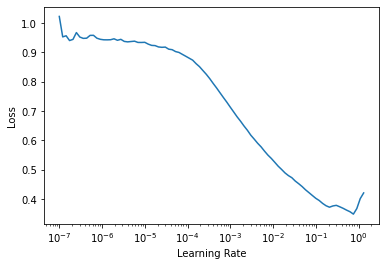

In [16]:
learn.lr_find()

In [17]:
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.755721,0.608134,0.898734,00:00
1,0.496173,0.491093,0.924051,00:00


In [18]:
row, clas, probs = learn.predict(cancer.iloc[4])

In [19]:
row['diagnosis'][0]

1.0

In [25]:

import seaborn as sn
import matplotlib.pyplot as plt

pre_arr = []
ans_arr = []

def check_model(data, target_col):

  size = len(data)

  for k in range(size):
    row, clas, probs = learn.predict(data.iloc[k])
    res = row[target_col][0]
    ans = data[target_col].values[k]
    if(ans == 'M'):
      ans = 1.0
    elif(ans == 'B'):
      ans = 0.0

    pre_arr.append(res)
    ans_arr.append(ans)
    
  # create confusion matrix from result
  res_data = list(zip(ans_arr, pre_arr))
  res_table = pd.DataFrame(res_data, columns = ['actual', 'predict'])
  confusion_matrix = pd.crosstab(res_table['actual'], res_table['predict'], rownames=['Actual'], colnames=['Predicted'])
  sn.heatmap(confusion_matrix, annot=True)
  plt.show()
  return confusion_matrix

In [ ]:
confusion_matrix = check_model(test, 'diagnosis')

In [27]:
confusion_matrix

Predicted,0.0,1.0
Actual,,
0.0,101,7
1.0,2,61
